In [1]:
# Import libraries for data manipulation and analysis
import pandas as pd
import numpy as np

# Import libraries for working with dates and times
import datetime as dt

# Import TensorFlow and Keras libraries for building and training neural networks
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, LSTM, SimpleRNN, Reshape, Flatten
from keras.models import load_model
from keras.callbacks import ModelCheckpoint
from keras.regularizers import l2

# Import scikit-learn library for various metrics and preprocessing tools
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error, r2_score
from sklearn.preprocessing import MinMaxScaler

# Import matplotlib library for creating plots and charts
import matplotlib.pyplot as plt

# Magic command to display plots inline in the Jupyter Notebook
%matplotlib inline

In [2]:
# Calculate the accuracy of each model
def evaluateModel(test,pred,val,pred_val):
  print('** Testing **')
  test_mae = mean_absolute_error(test, pred)
  print('MAE: ', test_mae)

  test_ape = np.abs((test - pred) / test)
  test_mape = np.mean(test_ape) * 100
  print('MAPE: ', test_mape)

  test_mse = mean_squared_error(test, pred)
  test_rmse = np.sqrt(test_mse)
  print('RMSE: ', test_rmse)

  print('\n** Validate **')
  val_mae = mean_absolute_error(val, pred_val)
  print('MAE: ', val_mae)

  val_ape = np.abs((val - pred_val) / val)
  val_mape = np.mean(val_ape) * 100
  print('MAPE: ', val_mape)

  val_mse = mean_squared_error(val, pred_val)
  val_rmse = np.sqrt(val_mse)
  print('RMSE: ', val_rmse)

In [3]:
# Read in the Gold dataset from a CSV file
df=pd.read_csv("../dataset/cleaned_GLD.csv")
df=df.set_index(pd.DatetimeIndex(df['Date'].values))


# Preprocessing Data

---

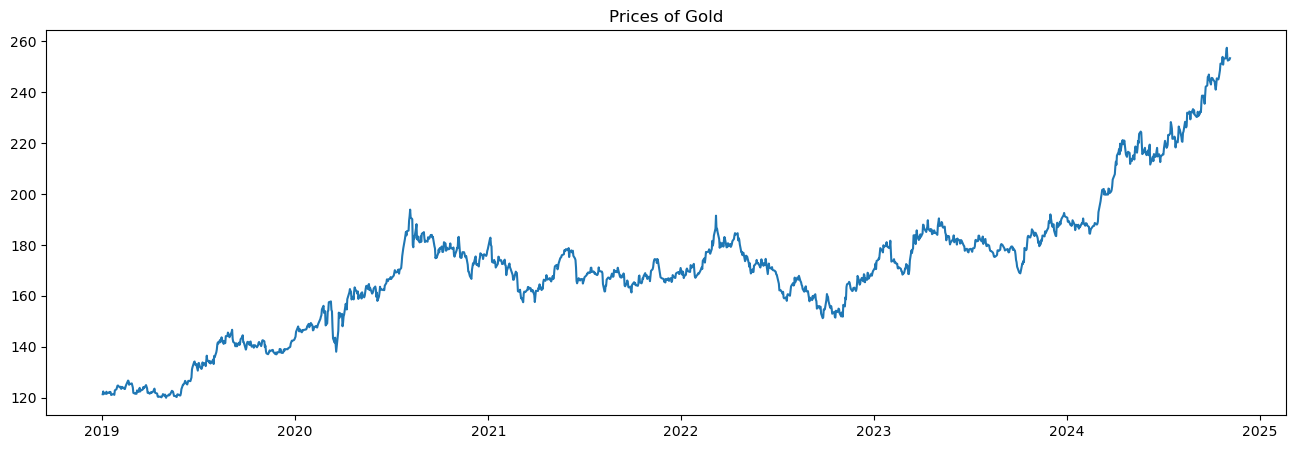

In [4]:
# Format column Date
df.index = pd.to_datetime(df.index,format='%m/%d/%Y')

# Create new Dataframe
df1 = pd.DataFrame(df, columns=['Date', 'Close'])
df1.drop('Date', axis = 1, inplace = True)

# Plot the 'price' column of the 'df' DataFrame
plt.figure(figsize=(16,5))
plt.plot(df1['Close'])
plt.title('Prices of Gold')
plt.show()

# Split dataset (7-2-1)

---



In [5]:
# Create a MinMaxScaler object with a specified range
data = df1.values
sc = MinMaxScaler(feature_range=(0, 1))

# Fit the scaler to the data and transform the data
sc_train = sc.fit_transform(data)

# Split the data
train_size = int(0.7 * len(sc_train))
test_size = int(0.2 * len(sc_train))
val_size = len(sc_train) - train_size - test_size

train_data = sc_train[:train_size]
test_data = sc_train[train_size:train_size+test_size]
val_data = sc_train[train_size+test_size:]
     

In [6]:
# Create training datasets for the model
x_train, y_train = [], []

# Loop through the train data, starting from the 5th value
for i in range(100, len(train_data)):
    # Append the last 100 values to the x_train array
    x_train.append(sc_train[i-100:i, 0])
    # Append the current value to the y_train array
    y_train.append(sc_train[i, 0])

In [7]:
# Convert the x_train and y_train arrays to NumPy arrays
x_train = np.array(x_train)
y_train = np.array(y_train)

# Reshape the x_train and y_train arrays to be one-dimensional
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
y_train = np.reshape(y_train, (y_train.shape[0], 1))

In [8]:
# Build the model
model = Sequential()

# Add an LSTM layer with 50 units, input shape of (x_train.shape[1], 1), and return_sequences set to True
model.add(LSTM(50,return_sequences=True,input_shape=(x_train.shape[1],1)))

# Add an LSTM layer with 50 units
model.add(LSTM(50,return_sequences=True))

# Add an LSTM layer with 50 units
model.add(LSTM(50))

# Add a dense layer with 1 unit
model.add(Dense(1))

# Compile the model with the 'mean_absolute_error' loss function and the 'adam' optimizer
model.compile(loss='mean_absolute_error', optimizer='adam')
# Set the filename to use for saving the model
save_model = 'save_model_7_2_1.keras'

# Create a ModelCheckpoint object to save the model during training
best_model = ModelCheckpoint(save_model, monitor='loss', verbose=2, save_best_only=True, mode='auto')

# Train the model using the 'fit' method
model.fit(x_train, y_train, epochs=80, batch_size=50, verbose=2, callbacks=[best_model])

Epoch 1/80


c:\Users\yashi\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)



Epoch 1: loss improved from inf to 0.09467, saving model to save_model_7_2_1.keras
19/19 - 4s - 229ms/step - loss: 0.0947
Epoch 2/80

Epoch 2: loss improved from 0.09467 to 0.03536, saving model to save_model_7_2_1.keras
19/19 - 1s - 52ms/step - loss: 0.0354
Epoch 3/80

Epoch 3: loss improved from 0.03536 to 0.02491, saving model to save_model_7_2_1.keras
19/19 - 1s - 52ms/step - loss: 0.0249
Epoch 4/80

Epoch 4: loss improved from 0.02491 to 0.02354, saving model to save_model_7_2_1.keras
19/19 - 1s - 55ms/step - loss: 0.0235
Epoch 5/80

Epoch 5: loss improved from 0.02354 to 0.02303, saving model to save_model_7_2_1.keras
19/19 - 1s - 55ms/step - loss: 0.0230
Epoch 6/80

Epoch 6: loss improved from 0.02303 to 0.02272, saving model to save_model_7_2_1.keras
19/19 - 1s - 63ms/step - loss: 0.0227
Epoch 7/80

Epoch 7: loss improved from 0.02272 to 0.02183, saving model to save_model_7_2_1.keras
19/19 - 1s - 78ms/step - loss: 0.0218
Epoch 8/80

Epoch 8: loss improved from 0.02183 to 0.02

In [9]:
# Transform the y_train array back to the original scale
y_train = sc.inverse_transform(y_train)

# Load the best model from the save_model.keras file
final_model = load_model('save_model_7_2_1.keras')

# Use the model to make predictions on the x_train data
y_train_predict = final_model.predict(x_train)

# Transform the y_train_predict array back to the original scale
y_train_predict = sc.inverse_transform(y_train_predict)

30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step


In [10]:
# Preprocess the test data
test = df1[len(train_data)-100:train_size+test_size].values
test = test.reshape(-1, 1)
sc_test = sc.transform(test)

# Create the x_test array for the test data
x_test = []
for i in range(100, test.shape[0]):
    x_test.append(sc_test[i-100:i, 0])
x_test = np.array(x_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

# Get the true values for the test data
y_test = data[train_size:train_size+test_size]  # True values

# Use the model to make predictions on the x_test data
y_test_predict = final_model.predict(x_test)

# Transform the y_test_predict array back to the original scale
y_test_predict = sc.inverse_transform(y_test_predict)  # Predicted values

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step


In [11]:
# Preprocess the validate data
val = df1[train_size+test_size-100:].values
val = val.reshape(-1, 1)
sc_val = sc.transform(val)

# Create the x_val array for the validate data
x_val = []
for i in range(100, val.shape[0]):
    x_val.append(sc_val[i-100:i, 0])
x_val = np.array(x_val)
x_val = np.reshape(x_val, (x_val.shape[0], x_val.shape[1], 1))

# Get the true values for the validate data
y_val = data[train_size+test_size:]  # True values

# Use the model to make predictions on the x_val data
y_val_predict = final_model.predict(x_val)

# Transform the y_val_predict array back to the original scale
y_val_predict = sc.inverse_transform(y_val_predict)  # Predicted values

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step


In [12]:
# Create an input array using the last 10 days of the scaled test data
x_input = sc_train[len(sc_train) - 100:].reshape(1, -1)

# Print the shape of the input array
print(x_input.shape)

# Convert x_input to a list and extract the first element
temp_input = list(x_input)
temp_input = temp_input[0].tolist()

# Print the temp_input variable
print(temp_input)

(1, 100)
[0.6963506467813428, 0.6882087805444975, 0.6944606024040815, 0.7140157241468285, 0.6894445918484079, 0.6956237581382451, 0.6878452809743288, 0.6734515921509435, 0.6909712471527404, 0.6911165582922342, 0.6951876022713742, 0.6951148362043879, 0.7127799128429179, 0.7341523121689849, 0.7142338013533084, 0.7169235018945653, 0.7227391678872782, 0.7510177333704752, 0.7499999999999999, 0.7552340884891088, 0.787656243023953, 0.7799505319270229, 0.7694096993790583, 0.7399679781616976, 0.7404769008225106, 0.7461471444515347, 0.7404769008225106, 0.7152515347237837, 0.7319715342885408, 0.7297179896141549, 0.7457109893116195, 0.7750072881652913, 0.7693370438093116, 0.7662110769039442, 0.745420144584242, 0.732480344998203, 0.7313899567849366, 0.7565425553627664, 0.7605408332749201, 0.7885286652549345, 0.7859842765801269, 0.7724628987635284, 0.7776243324098459, 0.8145536860637456, 0.8117912194555025, 0.8179703857453396, 0.8157167305737144, 0.7955073757576164, 0.8147717639971811, 0.82015116362

In [13]:
# Initialize variables
lst_output = []
n_steps = 100
i = 0

# Loop through the next 30 days
while(i < 30):
    # If the length of temp_input is greater than 30, use the first 30 elements to make a prediction
    if(len(temp_input) > 100):
        # Extract the first 3 elements of temp_input and reshape them for input to the model
        x_input = np.array(temp_input[1:])
        x_input = x_input.reshape((1, -1))
        x_input = x_input.reshape((1, n_steps, 1))

        # Make a prediction using the model
        yhat = model.predict(x_input, verbose=0)

        # Add the prediction to the temp_input list and remove the first element
        temp_input.extend(yhat[0].tolist())
        temp_input = temp_input[1:]

        # Add the prediction to the lst_output list
        lst_output.extend(yhat.tolist())
        i += 1
    # If the length of temp_input is less than 30, use the entire list to make a prediction
    else:
        # Reshape temp_input for input to the model
        x_input = x_input.reshape((1, n_steps, 1))

        # Make a prediction using the model
        yhat = model.predict(x_input, verbose=0)

        # Add the prediction to the temp_input list
        temp_input.extend(yhat[0].tolist())

        # Add the prediction to the lst_output list
        lst_output.extend(yhat.tolist())
        i += 1

# Print the final list of predictions
print(lst_output)

[[0.9154850244522095], [0.8332847952842712], [0.7857949733734131], [0.7661369442939758], [0.7497502565383911], [0.7293597459793091], [0.7071365118026733], [0.6857048273086548], [0.6661484241485596], [0.6486040353775024], [0.6328961253166199], [0.6188060641288757], [0.6061446070671082], [0.5947551131248474], [0.5845030546188354], [0.5752652287483215], [0.5669228434562683], [0.5593597888946533], [0.5524640679359436], [0.5461304783821106], [0.5402641296386719], [0.5347815752029419], [0.5296131372451782], [0.524702250957489], [0.5200069546699524], [0.5154970288276672], [0.5111534595489502], [0.5069667100906372], [0.5029347538948059], [0.4990622401237488]]


In [15]:
# Convert the 'date' column in the dataframe to a list of strings
datelist_train = df['Date'].astype(str).tolist()

# Parse the date strings using strptime(), using the correct format string
datelist_train = [dt.datetime.strptime(date, '%m/%d/%Y').date() for date in datelist_train]

# Generate a list of future dates, starting from the last date in the training data and going for 15 days
datelist_future = pd.date_range(datelist_train[-1], periods=30, freq='1d').tolist()

In [16]:
# Inverse transform the lst_output list using the StandardScaler object
y_pred_future = sc.inverse_transform(lst_output)

# Print the inverse transformed list of predictions
print(y_pred_future)

[[245.87412017]
 [234.56665684]
 [228.03395705]
 [225.32979862]
 [223.07564589]
 [220.27072731]
 [217.21369927]
 [214.2655568 ]
 [211.57537803]
 [209.16197195]
 [207.00119188]
 [205.0629631 ]
 [203.32125309]
 [201.75451433]
 [200.34424119]
 [199.07348589]
 [197.92590739]
 [196.88553362]
 [195.93695826]
 [195.0657097 ]
 [194.25873478]
 [193.5045546 ]
 [192.79358429]
 [192.11804278]
 [191.47215784]
 [190.85177245]
 [190.25427107]
 [189.67834182]
 [189.12370594]
 [188.59100295]]


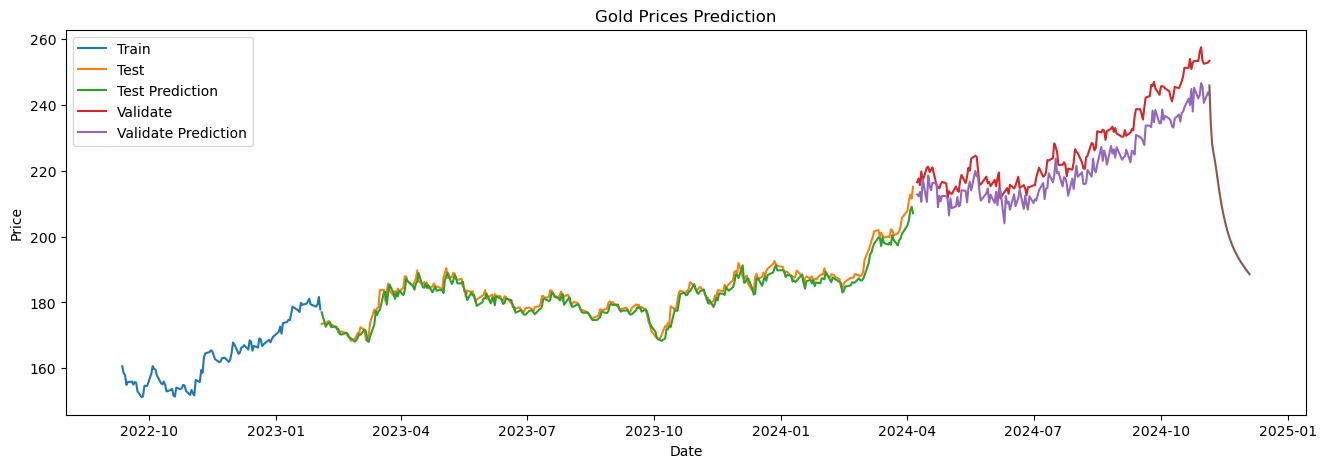

In [17]:
# Inverse transform the lst_output list using the StandardScaler object
y_pred_future = sc.inverse_transform(lst_output)

# Create a dataframe for the future predictions, with the date as the index and the 'price' column
PREDICTIONS_FUTURE = pd.DataFrame(y_pred_future, columns=['Close']).set_index(pd.Series(datelist_future))

train_data = df1[:train_size]
test_data = df1[train_size:train_size+test_size]
val_data = df1[train_size+test_size:]

# Set the figure size and create a subplot
plt.figure(figsize=(16,5))

# Create a plot to compare the predicted and true values for the training and test data
plt.plot(train_data.index[train_size-100:], train_data.Close[train_size-100:])
plt.plot(test_data)

# Plot the actual and predicted prices in the test set, and the predicted future prices
plt.plot(test_data.index, y_test_predict)
plt.plot(val_data)
plt.plot(val_data.index, y_val_predict)

plt.plot(PREDICTIONS_FUTURE)
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Gold Prices Prediction')
plt.legend(['Train','Test','Test Prediction','Validate', 'Validate Prediction'])
plt.show()

In [18]:
evaluateModel(test_data.values,y_test_predict,val_data.values,y_val_predict)

** Testing **
MAE:  1.5288116032027266
MAPE:  0.8203764132448617
RMSE:  1.9966176567686127

** Validate **
MAE:  6.410932283566038
MAPE:  2.7706350636918913
RMSE:  7.119218715698898


# Split dataset (6-3-1)

---



In [19]:
# 4. Split data (6-3-1)
train_size = int(0.6 * len(df1))
test_size = int(0.3 * len(df1))
val_size = len(df1) - train_size - test_size

train_data = df1[:train_size]
test_data = df1[train_size:train_size+test_size]
val_data = df1[train_size+test_size:]

In [20]:
# Create training datasets for the model
x_train, y_train = [], []

# Loop through the train data, starting from the 5th value
for i in range(100, len(train_data)):
    # Append the last 100 values to the x_train array
    x_train.append(sc_train[i-100:i, 0])
    # Append the current value to the y_train array
    y_train.append(sc_train[i, 0])

In [21]:
# Convert the x_train and y_train arrays to NumPy arrays
x_train = np.array(x_train)
y_train = np.array(y_train)

# Reshape the x_train and y_train arrays to be one-dimensional
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
y_train = np.reshape(y_train, (y_train.shape[0], 1))

In [22]:
# Build the model
model = Sequential()

# Add an LSTM layer with 50 units, input shape of (x_train.shape[1], 1), and return_sequences set to True
model.add(LSTM(50,return_sequences=True,input_shape=(x_train.shape[1],1)))

# Add an LSTM layer with 50 units
model.add(LSTM(50,return_sequences=True))

# Add an LSTM layer with 50 units
model.add(LSTM(50))

# Add a dense layer with 1 unit
model.add(Dense(1))

# Compile the model with the 'mean_absolute_error' loss function and the 'adam' optimizer
model.compile(loss='mean_absolute_error', optimizer='adam')
# Set the filename to use for saving the model
save_model = 'save_model_6_3_1.keras'

# Create a ModelCheckpoint object to save the model during training
best_model = ModelCheckpoint(save_model, monitor='loss', verbose=2, save_best_only=True, mode='auto')

# Train the model using the 'fit' method
model.fit(x_train, y_train, epochs=80, batch_size=50, verbose=2, callbacks=[best_model])

Epoch 1/80


c:\Users\yashi\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)



Epoch 1: loss improved from inf to 0.08700, saving model to save_model_6_3_1.keras
16/16 - 4s - 254ms/step - loss: 0.0870
Epoch 2/80

Epoch 2: loss improved from 0.08700 to 0.02896, saving model to save_model_6_3_1.keras
16/16 - 1s - 58ms/step - loss: 0.0290
Epoch 3/80

Epoch 3: loss improved from 0.02896 to 0.02376, saving model to save_model_6_3_1.keras
16/16 - 1s - 85ms/step - loss: 0.0238
Epoch 4/80

Epoch 4: loss improved from 0.02376 to 0.02282, saving model to save_model_6_3_1.keras
16/16 - 1s - 56ms/step - loss: 0.0228
Epoch 5/80

Epoch 5: loss did not improve from 0.02282
16/16 - 1s - 57ms/step - loss: 0.0231
Epoch 6/80

Epoch 6: loss did not improve from 0.02282
16/16 - 1s - 52ms/step - loss: 0.0253
Epoch 7/80

Epoch 7: loss improved from 0.02282 to 0.02210, saving model to save_model_6_3_1.keras
16/16 - 1s - 60ms/step - loss: 0.0221
Epoch 8/80

Epoch 8: loss improved from 0.02210 to 0.02178, saving model to save_model_6_3_1.keras
16/16 - 1s - 61ms/step - loss: 0.0218
Epoch 

In [23]:
# Transform the y_train array back to the original scale
y_train = sc.inverse_transform(y_train)

# Load the best model from the save_model.hdf5 file
final_model = load_model('save_model_6_3_1.keras')

# Use the model to make predictions on the x_train data
y_train_predict = final_model.predict(x_train)

# Transform the y_train_predict array back to the original scale
y_train_predict = sc.inverse_transform(y_train_predict)

25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step


In [24]:
# Preprocess the test data
test = df1[len(train_data)-100:train_size+test_size].values
test = test.reshape(-1, 1)
sc_test = sc.transform(test)

# Create the x_test array for the test data
x_test = []
for i in range(100, test.shape[0]):
    x_test.append(sc_test[i-100:i, 0])
x_test = np.array(x_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

# Get the true values for the test data
y_test = data[train_size:train_size+test_size]  # True values

# Use the model to make predictions on the x_test data
y_test_predict = final_model.predict(x_test)

# Transform the y_test_predict array back to the original scale
y_test_predict = sc.inverse_transform(y_test_predict)  # Predicted values

14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step


In [25]:
# Preprocess the validate data
val = df1[train_size+test_size-100:].values
val = val.reshape(-1, 1)
sc_val = sc.transform(val)

# Create the x_val array for the validate data
x_val = []
for i in range(100, val.shape[0]):
    x_val.append(sc_val[i-100:i, 0])
x_val = np.array(x_val)
x_val = np.reshape(x_val, (x_val.shape[0], x_val.shape[1], 1))

# Get the true values for the validate data
y_val = data[train_size+test_size:]  # True values

# Use the model to make predictions on the x_val data
y_val_predict = final_model.predict(x_val)

# Transform the y_val_predict array back to the original scale
y_val_predict = sc.inverse_transform(y_val_predict)  # Predicted values

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step


In [26]:
# Create an input array using the last 10 days of the scaled test data
x_input = sc_train[len(sc_train) - 100:].reshape(1, -1)

# Print the shape of the input array
print(x_input.shape)

# Convert x_input to a list and extract the first element
temp_input = list(x_input)
temp_input = temp_input[0].tolist()

# Print the temp_input variable
print(temp_input)

(1, 100)
[0.6963506467813428, 0.6882087805444975, 0.6944606024040815, 0.7140157241468285, 0.6894445918484079, 0.6956237581382451, 0.6878452809743288, 0.6734515921509435, 0.6909712471527404, 0.6911165582922342, 0.6951876022713742, 0.6951148362043879, 0.7127799128429179, 0.7341523121689849, 0.7142338013533084, 0.7169235018945653, 0.7227391678872782, 0.7510177333704752, 0.7499999999999999, 0.7552340884891088, 0.787656243023953, 0.7799505319270229, 0.7694096993790583, 0.7399679781616976, 0.7404769008225106, 0.7461471444515347, 0.7404769008225106, 0.7152515347237837, 0.7319715342885408, 0.7297179896141549, 0.7457109893116195, 0.7750072881652913, 0.7693370438093116, 0.7662110769039442, 0.745420144584242, 0.732480344998203, 0.7313899567849366, 0.7565425553627664, 0.7605408332749201, 0.7885286652549345, 0.7859842765801269, 0.7724628987635284, 0.7776243324098459, 0.8145536860637456, 0.8117912194555025, 0.8179703857453396, 0.8157167305737144, 0.7955073757576164, 0.8147717639971811, 0.82015116362

In [27]:
# Initialize variables
lst_output = []
n_steps = 100
i = 0

# Loop through the next 30 days
while(i < 30):
    # If the length of temp_input is greater than 30, use the first 30 elements to make a prediction
    if(len(temp_input) > 100):
        # Extract the first 3 elements of temp_input and reshape them for input to the model
        x_input = np.array(temp_input[1:])
        x_input = x_input.reshape((1, -1))
        x_input = x_input.reshape((1, n_steps, 1))

        # Make a prediction using the model
        yhat = model.predict(x_input, verbose=0)

        # Add the prediction to the temp_input list and remove the first element
        temp_input.extend(yhat[0].tolist())
        temp_input = temp_input[1:]

        # Add the prediction to the lst_output list
        lst_output.extend(yhat.tolist())
        i += 1
    # If the length of temp_input is less than 30, use the entire list to make a prediction
    else:
        # Reshape temp_input for input to the model
        x_input = x_input.reshape((1, n_steps, 1))

        # Make a prediction using the model
        yhat = model.predict(x_input, verbose=0)

        # Add the prediction to the temp_input list
        temp_input.extend(yhat[0].tolist())

        # Add the prediction to the lst_output list
        lst_output.extend(yhat.tolist())
        i += 1

# Print the final list of predictions
print(lst_output)

[[0.9419604539871216], [0.8807415962219238], [0.8266945481300354], [0.7961585521697998], [0.7845504879951477], [0.7803613543510437], [0.7756274342536926], [0.7679305672645569], [0.7584997415542603], [0.7496245503425598], [0.742872953414917], [0.7385299205780029], [0.7359456419944763], [0.7341757416725159], [0.7324576377868652], [0.730385422706604], [0.7278581857681274], [0.7249323129653931], [0.7216911911964417], [0.718180775642395], [0.7144066691398621], [0.7103633880615234], [0.7060617804527283], [0.7015431523323059], [0.6968740224838257], [0.6921326518058777], [0.6873961687088013], [0.6827302575111389], [0.6781873106956482], [0.6738063097000122]]


In [28]:
# Inverse transform the lst_output list using the StandardScaler object
y_pred_future = sc.inverse_transform(lst_output)

# Print the inverse transformed list of predictions
print(y_pred_future)

[[249.51608019]
 [241.09481426]
 [233.66010246]
 [229.45957093]
 [227.86276565]
 [227.28650843]
 [226.63531039]
 [225.57652939]
 [224.27922503]
 [223.05835375]
 [222.12960409]
 [221.5321765 ]
 [221.17668315]
 [220.93321566]
 [220.6968733 ]
 [220.41181939]
 [220.06417269]
 [219.66168963]
 [219.21584093]
 [218.73294817]
 [218.21378209]
 [217.65758836]
 [217.06585922]
 [216.44427675]
 [215.80199126]
 [215.14976832]
 [214.49821772]
 [213.85637498]
 [213.23144723]
 [212.62879675]]


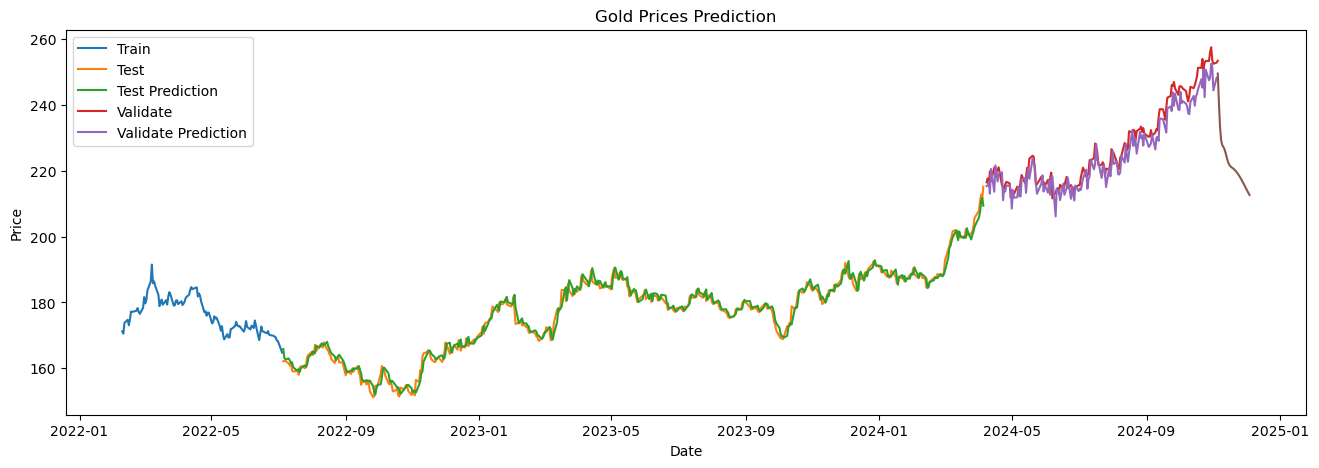

In [29]:
# Inverse transform the lst_output list using the StandardScaler object
y_pred_future = sc.inverse_transform(lst_output)

# Create a dataframe for the future predictions, with the date as the index and the 'price' column
PREDICTIONS_FUTURE = pd.DataFrame(y_pred_future, columns=['Close']).set_index(pd.Series(datelist_future))

train_data = df1[:train_size]
test_data = df1[train_size:train_size+test_size]
val_data = df1[train_size+test_size:]

# Set the figure size and create a subplot
plt.figure(figsize=(16,5))

# Create a plot to compare the predicted and true values for the training and test data
plt.plot(train_data.index[train_size-100:], train_data.Close[train_size-100:])
plt.plot(test_data)

# Plot the actual and predicted prices in the test set, and the predicted future prices
plt.plot(test_data.index, y_test_predict)
plt.plot(val_data)
plt.plot(val_data.index, y_val_predict)

plt.plot(PREDICTIONS_FUTURE)
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Gold Prices Prediction')
plt.legend(['Train','Test','Test Prediction','Validate', 'Validate Prediction'])
plt.show()

In [30]:
evaluateModel(test_data.values,y_test_predict,val_data.values,y_val_predict)

** Testing **
MAE:  1.239183040869473
MAPE:  0.7042987710266725
RMSE:  1.6182963637195127

** Validate **
MAE:  3.1446153812209676
MAPE:  1.362411715547362
RMSE:  3.8625132670688913


# Split dataset (5-3-2)

---



In [31]:
# Split data
train_size = int(0.5 * len(df1))
test_size = int(0.3 * len(df1))
val_size = len(df1) - train_size - test_size

train_data = df1[:train_size]
test_data = df1[train_size:train_size+test_size]
val_data = df1[train_size+test_size:]

In [32]:
# Create training datasets for the model
x_train, y_train = [], []

# Loop through the train data, starting from the 5th value
for i in range(100, len(train_data)):
    # Append the last 100 values to the x_train array
    x_train.append(sc_train[i-100:i, 0])
    # Append the current value to the y_train array
    y_train.append(sc_train[i, 0])

In [33]:
# Convert the x_train and y_train arrays to NumPy arrays
x_train = np.array(x_train)
y_train = np.array(y_train)

# Reshape the x_train and y_train arrays to be one-dimensional
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
y_train = np.reshape(y_train, (y_train.shape[0], 1))

In [34]:
# Build the model
model = Sequential()

# Add an LSTM layer with 50 units, input shape of (x_train.shape[1], 1), and return_sequences set to True
model.add(LSTM(50,return_sequences=True,input_shape=(x_train.shape[1],1)))

# Add an LSTM layer with 50 units
model.add(LSTM(50,return_sequences=True))

# Add an LSTM layer with 50 units
model.add(LSTM(50))

# Add a dense layer with 1 unit
model.add(Dense(1))

# Compile the model with the 'mean_absolute_error' loss function and the 'adam' optimizer
model.compile(loss='mean_absolute_error', optimizer='adam')
# Set the filename to use for saving the model
save_model = 'save_model_5_3_2.keras'

# Create a ModelCheckpoint object to save the model during training
best_model = ModelCheckpoint(save_model, monitor='loss', verbose=2, save_best_only=True, mode='auto')

# Train the model using the 'fit' method
model.fit(x_train, y_train, epochs=80, batch_size=50, verbose=2, callbacks=[best_model])

Epoch 1/80


c:\Users\yashi\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)



Epoch 1: loss improved from inf to 0.09607, saving model to save_model_5_3_2.keras
13/13 - 4s - 299ms/step - loss: 0.0961
Epoch 2/80

Epoch 2: loss improved from 0.09607 to 0.03201, saving model to save_model_5_3_2.keras
13/13 - 1s - 58ms/step - loss: 0.0320
Epoch 3/80

Epoch 3: loss improved from 0.03201 to 0.02503, saving model to save_model_5_3_2.keras
13/13 - 1s - 55ms/step - loss: 0.0250
Epoch 4/80

Epoch 4: loss improved from 0.02503 to 0.02415, saving model to save_model_5_3_2.keras
13/13 - 1s - 59ms/step - loss: 0.0241
Epoch 5/80

Epoch 5: loss improved from 0.02415 to 0.02330, saving model to save_model_5_3_2.keras
13/13 - 1s - 57ms/step - loss: 0.0233
Epoch 6/80

Epoch 6: loss improved from 0.02330 to 0.02168, saving model to save_model_5_3_2.keras
13/13 - 1s - 57ms/step - loss: 0.0217
Epoch 7/80

Epoch 7: loss did not improve from 0.02168
13/13 - 1s - 51ms/step - loss: 0.0219
Epoch 8/80

Epoch 8: loss did not improve from 0.02168
13/13 - 1s - 52ms/step - loss: 0.0240
Epoch 

In [35]:
# Transform the y_train array back to the original scale
y_train = sc.inverse_transform(y_train)

# Load the best model from the save_model.hdf5 file
final_model = load_model('save_model_5_3_2.keras')

# Use the model to make predictions on the x_train data
y_train_predict = final_model.predict(x_train)

# Transform the y_train_predict array back to the original scale
y_train_predict = sc.inverse_transform(y_train_predict)

20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step


In [36]:
# Preprocess the test data
test = df1[len(train_data)-100:train_size+test_size].values
test = test.reshape(-1, 1)
sc_test = sc.transform(test)

# Create the x_test array for the test data
x_test = []
for i in range(100, test.shape[0]):
    x_test.append(sc_test[i-100:i, 0])
x_test = np.array(x_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

# Get the true values for the test data
y_test = data[train_size:train_size+test_size]  # True values

# Use the model to make predictions on the x_test data
y_test_predict = final_model.predict(x_test)

# Transform the y_test_predict array back to the original scale
y_test_predict = sc.inverse_transform(y_test_predict)  # Predicted values

14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step


In [37]:
# Preprocess the validate data
val = df1[train_size+test_size-100:].values
val = val.reshape(-1, 1)
sc_val = sc.transform(val)

# Create the x_val array for the validate data
x_val = []
for i in range(100, val.shape[0]):
    x_val.append(sc_val[i-100:i, 0])
x_val = np.array(x_val)
x_val = np.reshape(x_val, (x_val.shape[0], x_val.shape[1], 1))

# Get the true values for the validate data
y_val = data[train_size+test_size:]  # True values

# Use the model to make predictions on the x_val data
y_val_predict = final_model.predict(x_val)

# Transform the y_val_predict array back to the original scale
y_val_predict = sc.inverse_transform(y_val_predict)  # Predicted values

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step


In [38]:
# Create an input array using the last 10 days of the scaled test data
x_input = sc_train[len(sc_train) - 100:].reshape(1, -1)

# Print the shape of the input array
print(x_input.shape)

# Convert x_input to a list and extract the first element
temp_input = list(x_input)
temp_input = temp_input[0].tolist()

# Print the temp_input variable
print(temp_input)

(1, 100)
[0.6963506467813428, 0.6882087805444975, 0.6944606024040815, 0.7140157241468285, 0.6894445918484079, 0.6956237581382451, 0.6878452809743288, 0.6734515921509435, 0.6909712471527404, 0.6911165582922342, 0.6951876022713742, 0.6951148362043879, 0.7127799128429179, 0.7341523121689849, 0.7142338013533084, 0.7169235018945653, 0.7227391678872782, 0.7510177333704752, 0.7499999999999999, 0.7552340884891088, 0.787656243023953, 0.7799505319270229, 0.7694096993790583, 0.7399679781616976, 0.7404769008225106, 0.7461471444515347, 0.7404769008225106, 0.7152515347237837, 0.7319715342885408, 0.7297179896141549, 0.7457109893116195, 0.7750072881652913, 0.7693370438093116, 0.7662110769039442, 0.745420144584242, 0.732480344998203, 0.7313899567849366, 0.7565425553627664, 0.7605408332749201, 0.7885286652549345, 0.7859842765801269, 0.7724628987635284, 0.7776243324098459, 0.8145536860637456, 0.8117912194555025, 0.8179703857453396, 0.8157167305737144, 0.7955073757576164, 0.8147717639971811, 0.82015116362

In [39]:
# Initialize variables
lst_output = []
n_steps = 100
i = 0

# Loop through the next 30 days
while(i < 30):
    # If the length of temp_input is greater than 30, use the first 30 elements to make a prediction
    if(len(temp_input) > 100):
        # Extract the first 3 elements of temp_input and reshape them for input to the model
        x_input = np.array(temp_input[1:])
        x_input = x_input.reshape((1, -1))
        x_input = x_input.reshape((1, n_steps, 1))

        # Make a prediction using the model
        yhat = model.predict(x_input, verbose=0)

        # Add the prediction to the temp_input list and remove the first element
        temp_input.extend(yhat[0].tolist())
        temp_input = temp_input[1:]

        # Add the prediction to the lst_output list
        lst_output.extend(yhat.tolist())
        i += 1
    # If the length of temp_input is less than 30, use the entire list to make a prediction
    else:
        # Reshape temp_input for input to the model
        x_input = x_input.reshape((1, n_steps, 1))

        # Make a prediction using the model
        yhat = model.predict(x_input, verbose=0)

        # Add the prediction to the temp_input list
        temp_input.extend(yhat[0].tolist())

        # Add the prediction to the lst_output list
        lst_output.extend(yhat.tolist())
        i += 1

# Print the final list of predictions
print(lst_output)

[[0.9290958642959595], [0.8612620830535889], [0.7893272638320923], [0.7408263683319092], [0.7201536297798157], [0.7115835547447205], [0.6966949105262756], [0.6673429012298584], [0.627964973449707], [0.5893975496292114], [0.5602820515632629], [0.5424944758415222], [0.5324334502220154], [0.524972677230835], [0.5165296792984009], [0.5060897469520569], [0.49463513493537903], [0.483882874250412], [0.47516435384750366], [0.4689132273197174], [0.4647549092769623], [0.4619069993495941], [0.4595876932144165], [0.45726945996284485], [0.45474448800086975], [0.452053964138031], [0.4493558406829834], [0.44680237770080566], [0.4444679021835327], [0.4423334300518036]]


In [40]:
# Inverse transform the lst_output list using the StandardScaler object
y_pred_future = sc.inverse_transform(lst_output)

# Print the inverse transformed list of predictions
print(y_pred_future)

[[247.74642726]
 [238.41521248]
 [228.51985892]
 [221.84807585]
 [219.00433398]
 [217.82543448]
 [215.77735262]
 [211.73969029]
 [206.32286264]
 [201.01752791]
 [197.01240007]
 [194.56554119]
 [193.18154653]
 [192.15524262]
 [190.99382384]
 [189.55770678]
 [187.98201037]
 [186.50292942]
 [185.30360977]
 [184.44370482]
 [183.8716866 ]
 [183.47992812]
 [183.16088438]
 [182.84198822]
 [182.49465308]
 [182.12454462]
 [181.75339077]
 [181.4021364 ]
 [181.08100596]
 [180.78738798]]


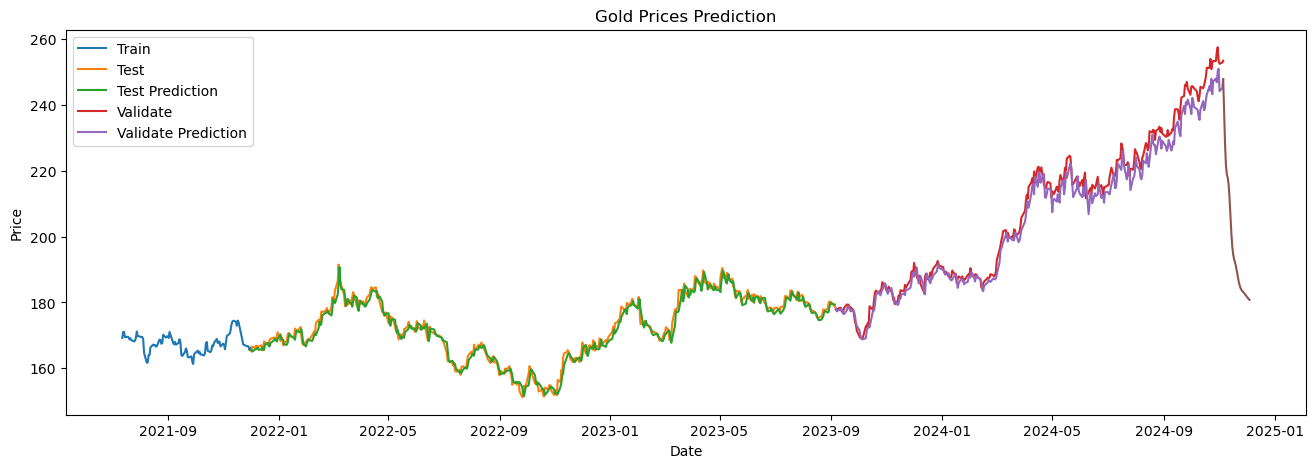

In [41]:
# Inverse transform the lst_output list using the StandardScaler object
y_pred_future = sc.inverse_transform(lst_output)

# Create a dataframe for the future predictions, with the date as the index and the 'price' column
PREDICTIONS_FUTURE = pd.DataFrame(y_pred_future, columns=['price']).set_index(pd.Series(datelist_future))

train_data = df1[:train_size]
test_data = df1[train_size:train_size+test_size]
val_data = df1[train_size+test_size:]

# Set the figure size and create a subplot
plt.figure(figsize=(16,5))

# Create a plot to compare the predicted and true values for the training and test data
plt.plot(train_data.index[train_size-100:], train_data.Close[train_size-100:])
plt.plot(test_data)

# Plot the actual and predicted prices in the test set, and the predicted future prices
plt.plot(test_data.index, y_test_predict)
plt.plot(val_data)
plt.plot(val_data.index, y_val_predict)

plt.plot(PREDICTIONS_FUTURE)
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Gold Prices Prediction')
plt.legend(['Train','Test','Test Prediction','Validate', 'Validate Prediction'])
plt.show()

In [42]:
evaluateModel(test_data.values,y_test_predict,val_data.values,y_val_predict)

** Testing **
MAE:  1.3511925183345737
MAPE:  0.7814230235020286
RMSE:  1.7422348412575328

** Validate **
MAE:  2.7956414694319394
MAPE:  1.283501662976771
RMSE:  3.5892675380897496
